In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import stats
import calendar
import datetime

cwd = os.getcwd()
#print(cwd)

In [13]:
# Load the CSV data into a Pandas DataFrame
data = pd.read_csv('clean_median_sale_price_v2_df.csv', index_col=0)
data.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,344911.0,339350.0,335350.0,333517.0,342000.0,356000.0,371000.0,380667.0,...,543333.0,528333.0,518333.0,515333.0,509500.0,510333.0,516667.0,535833.0,558333.0,579667.0
1,"Los Angeles, CA",CA,394000.0,397333.0,407333.0,430667.0,450667.0,465000.0,468333.0,471667.0,...,852000.0,840333.0,827000.0,818333.0,816667.0,827333.0,839000.0,854000.0,873333.0,888333.0
2,"Chicago, IL",IL,162833.0,158000.0,160218.0,170218.0,183385.0,197833.0,207500.0,212333.0,...,285000.0,278333.0,273333.0,270000.0,269000.0,275633.0,287300.0,300300.0,313167.0,319833.0
3,"Dallas, TX",TX,151667.0,152167.0,155333.0,164500.0,172800.0,178467.0,181633.0,181125.0,...,390500.0,382500.0,373333.0,363333.0,362333.0,367000.0,377000.0,384667.0,395000.0,400333.0
4,"Houston, TX",TX,149833.0,148572.0,150405.0,160155.0,167417.0,174900.0,177650.0,178650.0,...,321000.0,316000.0,310667.0,306000.0,304333.0,306333.0,313333.0,321667.0,328667.0,333667.0


In [14]:
# Author: anderoos
# This script is meant to break up Zillow Data from the continental US into five distinct regions
# West, Midwest, Southwest, Southeast, Northeast
def split_regions(df):
    df['StateName'] = df['StateName'].astype('str')
    # Define categories
    northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    southeast = ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'LA', 'KY', 'TN']
    midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
    west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
    southwest = ['TX', 'OK', 'AR']
    # Filters state codes into separate dataframes
    ne_df = df[df['StateName'].isin(northeast)]
    se_df = df[df['StateName'].isin(southeast)]
    mw_df = df[df['StateName'].isin(midwest)]
    w_df = df[df['StateName'].isin(west)]
    sw_df = df[df['StateName'].isin(southwest)]
    return ne_df, se_df, mw_df, w_df, sw_df

In [15]:
# Split the data into regions
ne_df, se_df, mw_df, w_df, sw_df = split_regions(data)

In [16]:
sw_df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
3,"Dallas, TX",TX,151667.0,152167.0,155333.0,164500.0,172800.0,178467.0,181633.0,181125.0,...,390500.0,382500.0,373333.0,363333.0,362333.0,367000.0,377000.0,384667.0,395000.0,400333.0
4,"Houston, TX",TX,149833.0,148572.0,150405.0,160155.0,167417.0,174900.0,177650.0,178650.0,...,321000.0,316000.0,310667.0,306000.0,304333.0,306333.0,313333.0,321667.0,328667.0,333667.0
23,"San Antonio, TX",TX,146967.0,146967.0,147783.0,151800.0,157317.0,164150.0,169067.0,168550.0,...,322667.0,316000.0,312333.0,305667.0,306000.0,303667.0,307000.0,310667.0,314000.0,317333.0
28,"Austin, TX",TX,193833.0,196833.0,201000.0,210667.0,217667.0,222750.0,222083.0,220417.0,...,496277.0,482944.0,468058.0,459781.0,453114.0,457333.0,464000.0,474000.0,484667.0,483333.0
40,"Oklahoma City, OK",OK,122633.0,123064.0,126564.0,128914.0,130983.0,133483.0,136833.0,138083.0,...,239333.0,237333.0,229500.0,223833.0,221833.0,229667.0,237500.0,244500.0,248667.0,252833.0


In [17]:
sw_df_states = sw_df.drop(columns=['RegionName'])
sw_df_states = sw_df_states.groupby('StateName').mean()
#sw_df_states.to_csv("test.csv")
sw_df_states

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
AR,113140.500000,114328.250000,114876.375,117305.750000,118360.500000,120959.000000,122664.250000,125274.000000,123174.125000,120270.750000,...,205190.250000,204173.125000,203160.625000,201094.000000,199447.750000,201185.250000,201170.875000,207448.000000,211662.500000,216482.5
OK,107103.857143,106841.142857,109030.000,110972.857143,114164.142857,118616.571429,123773.714286,125007.142857,121304.714286,117028.428571,...,196321.285714,191833.428571,186142.857143,183083.428571,182007.285714,188833.714286,190952.714286,197754.571429,199559.142857,206071.0
TX,133253.450000,131837.100000,132415.950,137839.100000,142976.550000,148510.750000,152740.900000,152935.500000,150245.100000,144796.900000,...,287739.750000,279372.200000,272108.500000,267473.300000,266475.600000,269761.800000,274608.900000,281847.050000,287174.600000,291119.1


In [18]:
#author: PSam
number_of_periods = len(sw_df_states.columns)

growth_rate_by_state = pd.DataFrame({
    "Growth Rate":((sw_df_states["7/31/2023"] / 
                           sw_df_states["1/31/2013"])**(12/number_of_periods)-1)
})

top_state = growth_rate_by_state["Growth Rate"].nlargest(1).index
bottom_state = growth_rate_by_state["Growth Rate"].nsmallest(1).index

top_state

Index(['TX'], dtype='object', name='StateName')

In [19]:
# Transpose the DataFrame to have dates on the x-axis and TX values on the y-axis
top_state_df = sw_df[sw_df['StateName'] == top_state[0]]
top_state_df = top_state_df.drop(columns=["RegionName"])
top_state_df

,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
3,TX,151667.0,152167.0,155333.0,164500.0,172800.0,178467.0,181633.0,181125.0,178125.0,...,390500.0,382500.0,373333.0,363333.0,362333.0,367000.0,377000.0,384667.0,395000.0,400333.0
4,TX,149833.0,148572.0,150405.0,160155.0,167417.0,174900.0,177650.0,178650.0,174833.0,...,321000.0,316000.0,310667.0,306000.0,304333.0,306333.0,313333.0,321667.0,328667.0,333667.0
23,TX,146967.0,146967.0,147783.0,151800.0,157317.0,164150.0,169067.0,168550.0,165250.0,...,322667.0,316000.0,312333.0,305667.0,306000.0,303667.0,307000.0,310667.0,314000.0,317333.0
28,TX,193833.0,196833.0,201000.0,210667.0,217667.0,222750.0,222083.0,220417.0,217167.0,...,496277.0,482944.0,468058.0,459781.0,453114.0,457333.0,464000.0,474000.0,484667.0,483333.0
65,TX,107383.0,105717.0,105917.0,105167.0,105313.0,106813.0,112980.0,114483.0,118703.0,...,209667.0,209000.0,209167.0,202167.0,198750.0,194083.0,200750.0,210833.0,216667.0,217833.0
67,TX,122447.0,120908.0,120208.0,123950.0,124267.0,127798.0,128981.0,131331.0,128833.0,...,224833.0,227500.0,227667.0,226000.0,223333.0,223333.0,226667.0,232325.0,238992.0,245408.0
116,TX,114333.0,110300.0,103967.0,103967.0,111333.0,117000.0,121667.0,120167.0,115288.0,...,265667.0,258500.0,251667.0,248333.0,250000.0,248000.0,248333.0,253333.0,262167.0,263500.0
125,TX,136513.0,134179.0,135000.0,136333.0,140875.0,148375.0,153608.0,152067.0,150233.0,...,271167.0,261950.0,258617.0,251283.0,252000.0,254667.0,262467.0,270800.0,273133.0,278166.0
134,TX,93247.0,90270.0,92270.0,107627.0,104124.0,108624.0,110837.0,123082.0,124253.0,...,211917.0,190083.0,182733.0,179367.0,183450.0,184883.0,187250.0,193333.0,187917.0,177250.0
156,TX,115800.0,116967.0,118150.0,121000.0,122333.0,122863.0,124644.0,122727.0,122889.0,...,224000.0,220667.0,215333.0,216083.0,212750.0,215917.0,214833.0,222500.0,226167.0,227833.0


In [20]:
# Groupby to average the values of top state - NH
sw_top_state_gb = top_state_df.groupby("StateName").mean()

# Created forloop to assign a number to each column to calculate linear regression
num = 1

for i in range(len(sw_top_state_gb.columns)):
    sw_top_state_gb.loc["Time Period", sw_top_state_gb.columns[i]] = num
    num += 1

sw_top_state_gb


,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
TX,133253.45,131837.1,132415.95,137839.1,142976.55,148510.75,152740.9,152935.5,150245.1,144796.9,...,287739.75,279372.2,272108.5,267473.3,266475.6,269761.8,274608.9,281847.05,287174.6,291119.1
Time Period,1.00,2.0,3.00,4.0,5.00,6.00,7.0,8.0,9.0,10.0,...,118.00,119.0,120.0,121.0,122.0,123.0,124.0,125.00,126.0,127.0


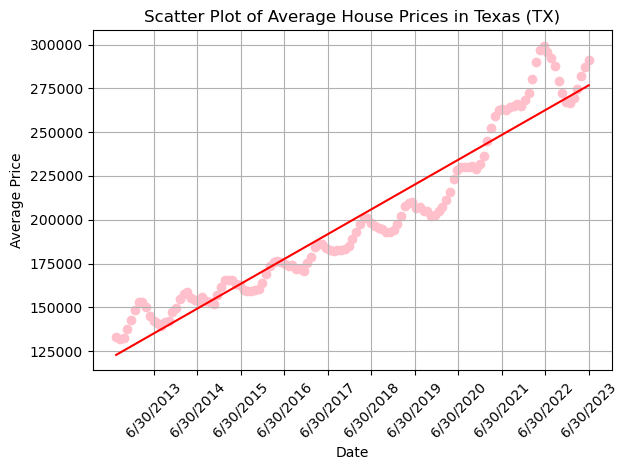

In [21]:
# Assign x and y values
x = sw_top_state_gb.loc['Time Period'].values
y = sw_top_state_gb.loc['TX'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

custom_x_ticks = ["6/30/2023", "6/30/2022", "6/30/2021","6/30/2020", "6/30/2019","6/30/2018",
                  "6/30/2017", "6/30/2016", "6/30/2015", "6/30/2014", "6/30/2013"]

# Create a scatter plot of the data points
plt.scatter(x, y, marker='o', color='pink', label='TX Average Prices')

# Add the linear regression line to the plot
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Regression Line')

# y = mx + b
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, 350000), fontsize=15, color="red")

plt.title('Scatter Plot of Average House Prices in Texas (TX)')
plt.xlabel('Date')
plt.ylabel('Average Price')

# Set custom tick locations and labels
tick_locations = np.linspace(len(sw_top_state_gb.columns), len(custom_x_ticks), num=len(custom_x_ticks))
plt.xticks(tick_locations, custom_x_ticks, rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig("Images/Linear Regression/Southwest/Scatter Plot of Average House Prices in Texas (TX).png")
plt.show()


In [22]:
value_predictions = pd.DataFrame(sw_top_state_gb["7/31/2023"])
value_predictions = value_predictions.drop("Time Period")

start_date = datetime.date(2023,8,31) # Starting from August 31, 2023
end_date = datetime.date(2025,12,31) # Ending on Dec 31, 2025
date_range = pd.date_range(start_date, end_date, freq='M')

x_places = 128

# Add columns for each month in the date range
for date in date_range:
    month_year = date.strftime('%m/%d/%Y')
    value_predictions[month_year] = round(slope, 2) * x_places + round(intercept, 2)
    x_places += 1

value_predictions = value_predictions.transpose()
value_predictions.index.name = "Month End"
value_predictions.columns.name = None

value_predictions


,TX
Month End,
7/31/2023,291119.10
08/31/2023,277968.39
09/30/2023,279190.06
10/31/2023,280411.73
11/30/2023,281633.40
12/31/2023,282855.07
01/31/2024,284076.74
02/29/2024,285298.41
03/31/2024,286520.08


In [22]:
# Repeat script for bottom state

In [24]:
# Transpose the DataFrame to have dates on the x-axis and AR values on the y-axis
bottom_state_df = sw_df[sw_df['StateName'] == bottom_state[0]]
bottom_state_df = bottom_state_df.drop(columns=["RegionName"])
bottom_state_df

,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
79,AR,162633.0,162967.0,164300.0,167667.0,171417.0,176083.0,180083.0,179667.0,177067.0,...,220167.0,219201.0,214501.0,208751.0,208133.0,210333.0,218083.0,220500.0,225667.0,229000.0
105,AR,122333.0,122000.0,123000.0,130667.0,135667.0,141000.0,140000.0,143183.0,137517.0,...,310322.0,311667.0,314167.0,312500.0,309833.0,314000.0,315667.0,329667.0,338000.0,347176.0
185,AR,90000.0,92000.0,95500.0,103500.0,108000.0,108667.0,107667.0,108667.0,110000.0,...,179000.0,174000.0,171167.0,173000.0,176333.0,176333.0,171833.0,179583.0,186583.0,196083.0
286,AR,110325.0,113825.0,108667.0,111250.0,110583.0,117250.0,123667.0,126667.0,120667.0,...,202500.0,199150.0,198150.0,184150.0,185167.0,191833.0,206667.0,213000.0,216000.0,207317.0
338,AR,127333.0,121000.0,118795.0,129295.0,136629.0,144667.0,150167.0,147833.0,140333.0,...,247083.0,234750.0,230750.0,229167.0,235417.0,238717.0,240117.0,242167.0,248617.0,253717.0
361,AR,91000.0,91667.0,94583.0,83417.0,82272.0,80522.0,86230.0,86675.0,90475.0,...,146983.0,144667.0,147667.0,147667.0,142333.0,139833.0,124033.0,118200.0,123450.0,140917.0
386,AR,109500.0,113167.0,115833.0,119500.0,112833.0,110000.0,108167.0,113167.0,115667.0,...,165917.0,175667.0,183083.0,189750.0,180083.0,179483.0,175650.0,184317.0,181583.0,188417.0
461,AR,92000.0,98000.0,98333.0,93150.0,89483.0,89483.0,85333.0,96333.0,93667.0,...,169550.0,174283.0,165800.0,163767.0,158283.0,158950.0,157317.0,172150.0,173400.0,169233.0


In [25]:
# Groupby to average the values of bottom state - AR
sw_bottom_state_gb = bottom_state_df.groupby("StateName").mean()

# Created forloop to assign a number to each column to calculate linear regression
num = 1

for i in range(len(sw_bottom_state_gb.columns)):
    sw_bottom_state_gb.loc["Time Period", sw_bottom_state_gb.columns[i]] = num
    num += 1

sw_bottom_state_gb

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
AR,113140.5,114328.25,114876.375,117305.75,118360.5,120959.0,122664.25,125274.0,123174.125,120270.75,...,205190.25,204173.125,203160.625,201094.0,199447.75,201185.25,201170.875,207448.0,211662.5,216482.5
Time Period,1.0,2.00,3.000,4.00,5.0,6.0,7.00,8.0,9.000,10.00,...,118.00,119.000,120.000,121.0,122.00,123.00,124.000,125.0,126.0,127.0


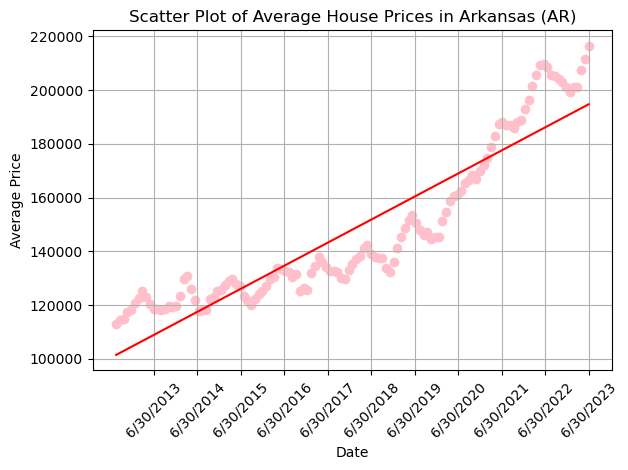

In [27]:
# Assign x and y values
x = sw_bottom_state_gb.loc['Time Period'].values
y = sw_bottom_state_gb.loc['AR'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

custom_x_ticks = ["6/30/2023", "6/30/2022", "6/30/2021","6/30/2020", "6/30/2019","6/30/2018",
                  "6/30/2017", "6/30/2016", "6/30/2015", "6/30/2014", "6/30/2013"]

# Create a scatter plot of the data points
plt.scatter(x, y, marker='o', color='pink', label='NM Average Prices')

# Add the linear regression line to the plot
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Regression Line')

# y = mx + b
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, 350000), fontsize=15, color="red")

plt.title('Scatter Plot of Average House Prices in Arkansas (AR)')
plt.xlabel('Date')
plt.ylabel('Average Price')

# Set custom tick locations and labels
tick_locations = np.linspace(len(sw_bottom_state_gb.columns), len(custom_x_ticks), num=len(custom_x_ticks))
plt.xticks(tick_locations, custom_x_ticks, rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig("Images/Linear Regression/Southwest/Scatter Plot of Average House Prices in Arkansas (AR).png")
plt.show()

In [28]:
value_predictions_bottom = pd.DataFrame(sw_bottom_state_gb["7/31/2023"])
value_predictions_bottom = value_predictions_bottom.drop("Time Period")

start_date = datetime.date(2023,8,31) # Starting from August 31, 2023
end_date = datetime.date(2025,12,31) # Ending on Dec 31, 2025
date_range = pd.date_range(start_date, end_date, freq='M')

x_places = 128

# Add columns for each month in the date range
for date in date_range:
    month_year = date.strftime('%m/%d/%Y')
    value_predictions_bottom[month_year] = round(slope, 2) * x_places + round(intercept, 2)
    x_places += 1

value_predictions_bottom = value_predictions_bottom.transpose()
value_predictions_bottom.index.name = "Month End"
value_predictions_bottom.columns.name = None

value_predictions_bottom

,AR
Month End,
7/31/2023,216482.50
08/31/2023,195478.32
09/30/2023,196218.35
10/31/2023,196958.38
11/30/2023,197698.41
12/31/2023,198438.44
01/31/2024,199178.47
02/29/2024,199918.50
03/31/2024,200658.53


In [29]:
top_bottom_sw_states = value_predictions.merge(value_predictions_bottom, left_index=True, right_index=True)
top_bottom_sw_states.to_csv("Value Predictions for Top and Bottom SW States.csv")